In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('E:\\Data Science\\all csv files\\houseprice.csv')
df

,area,bedroom,age,price
0,855,2.0,12.0,800000
1,1120,NaN,10.0,1000000
2,2200,3.0,8.0,1200000
3,2698,4.0,NaN,960000
4,3090,NaN,21.0,1100000
5,3900,3.0,15.0,1400000
6,4600,NaN,NaN,1600000
7,5100,5.0,11.0,1800000
8,6500,2.0,30.0,1000000
9,7000,4.0,5.0,2500000


In [3]:
df.isnull().sum()

area       0
bedroom    3
age        2
price      0
dtype: int64

In [4]:
df.bedroom.median()

3.0

In [5]:
df.age.median()

11.5

In [6]:
df.bedroom=df.bedroom.fillna(df.bedroom.median())
df

,area,bedroom,age,price
0,855,2.0,12.0,800000
1,1120,3.0,10.0,1000000
2,2200,3.0,8.0,1200000
3,2698,4.0,NaN,960000
4,3090,3.0,21.0,1100000
5,3900,3.0,15.0,1400000
6,4600,3.0,NaN,1600000
7,5100,5.0,11.0,1800000
8,6500,2.0,30.0,1000000
9,7000,4.0,5.0,2500000


In [7]:
df.age=df.age.fillna(df.age.median())
df

,area,bedroom,age,price
0,855,2.0,12.0,800000
1,1120,3.0,10.0,1000000
2,2200,3.0,8.0,1200000
3,2698,4.0,11.5,960000
4,3090,3.0,21.0,1100000
5,3900,3.0,15.0,1400000
6,4600,3.0,11.5,1600000
7,5100,5.0,11.0,1800000
8,6500,2.0,30.0,1000000
9,7000,4.0,5.0,2500000


In [8]:
df.isnull().sum()

area       0
bedroom    0
age        0
price      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   area     10 non-null     int64  
 1   bedroom  10 non-null     float64
 2   age      10 non-null     float64
 3   price    10 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 448.0 bytes


In [10]:
df.describe()

,area,bedroom,age,price
count,10.000000,10.000000,10.000000,1.000000e+01
mean,3706.300000,3.200000,13.500000,1.336000e+06
std,2105.973834,0.918937,7.164728,5.134459e+05
min,855.000000,2.000000,5.000000,8.000000e+05
25%,2324.500000,3.000000,10.250000,1.000000e+06
50%,3495.000000,3.000000,11.500000,1.150000e+06
75%,4975.000000,3.750000,14.250000,1.550000e+06
max,7000.000000,5.000000,30.000000,2.500000e+06


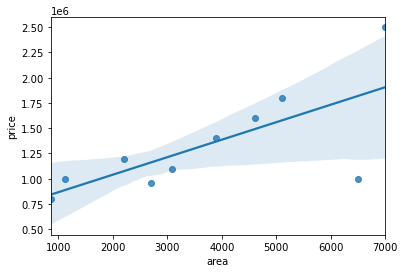

In [11]:
#to know bestfit line
sns.regplot(x='area',y='price',data=df)
plt.show()

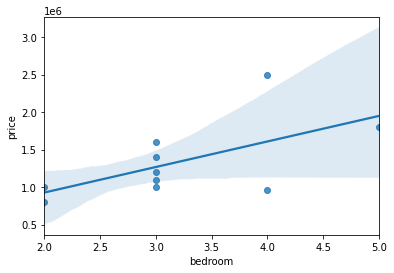

In [12]:
sns.regplot(x='bedroom',y='price',data=df)
plt.show()

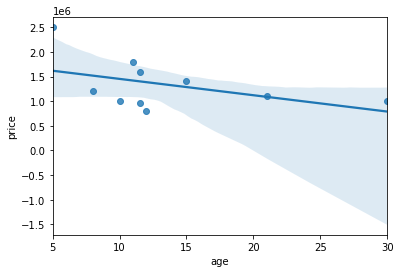

In [13]:
sns.regplot(x='age',y='price',data=df)
plt.show()

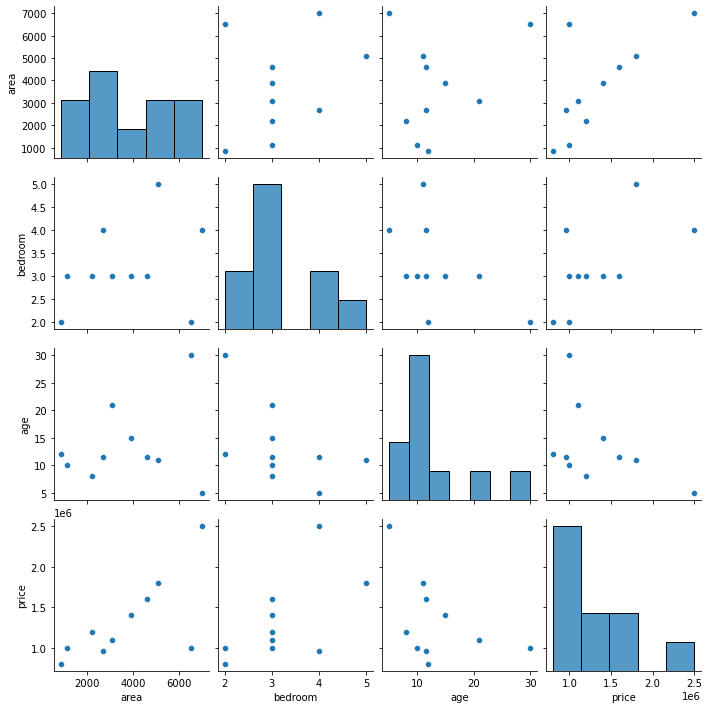

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
df.corr()#to check relation with target variable to other parameters

,area,bedroom,age,price
area,1.000000,0.294558,0.236575,0.710759
bedroom,0.294558,1.000000,-0.514721,0.609455
age,0.236575,-0.514721,1.000000,-0.462724
price,0.710759,0.609455,-0.462724,1.000000


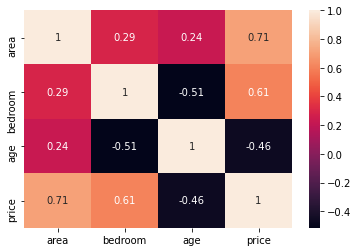

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [47]:
x=df.iloc[:,0:2]
y=df.iloc[:,3:4]

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [61]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [62]:
x_test

,area,bedroom
9,7000,4.0
0,855,2.0
8,6500,2.0


In [64]:
y_pred=xgb_model.predict(x_test)
y_pred

array([1799999.6 ,  999999.94, 1799999.6 ], dtype=float32)

In [65]:
y_test

,price
9,2500000
0,800000
8,1000000


In [66]:
xgb_model.score(x_train,y_train)*100

99.99999999992386

In [67]:
xgb_model.score(x_test,y_test)*100

32.23938803087151

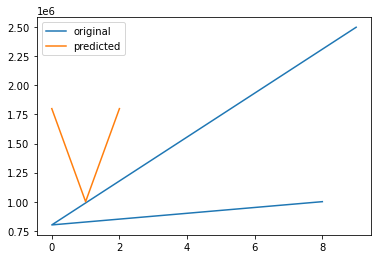

In [68]:
plt.plot(y_test,label='original')
plt.plot(y_pred,label='predicted')
plt.legend()
plt.show()